#  Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Preprocessed dataset.csv')
df.head(5)

,id,title,tagline,overview,release_date,genres,belongs_to_collection,original_language,spoken_languages,production_countries,...,runtime,budget,revenue,popularity,vote_count,vote_average,cast,cast_size,crew_size,director
0,299534,Avengers: Endgame,Avenge the fallen.,After the devastating events of Avengers: Infi...,24/04/2019,"Adventure, Science Fiction, Action",The Avengers Collection,en,English|日本語|,United States of America,...,181,356,2799.439100,22.6136,26202,8.238,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,593,Anthony Russo
1,19995,Avatar,Enter the world of Pandora.,"In the 22nd century, a paraplegic Marine is di...",15/12/2009,"Action, Adventure, Fantasy, Science Fiction",Avatar Collection,en,English|Español,United States of America|United Kingdom,...,162,237,2923.706026,33.5372,32106,7.587,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,986,James Cameron
2,140607,Star Wars: The Force Awakens,Every generation has a story.,Thirty years after defeating the Galactic Empi...,15/12/2015,"Adventure, Action, Science Fiction",Star Wars Collection,en,English,United States of America,...,136,245,2068.223624,13.3565,19662,7.262,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,257,J.J. Abrams
3,299536,Avengers: Infinity War,Destiny arrives all the same.,As the Avengers and their allies have continue...,25/04/2018,"Adventure, Action, Science Fiction",The Avengers Collection,en,English|,United States of America,...,149,300,2052.415039,35.5559,30381,8.236,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,724,Joe Russo
4,597,Titanic,Nothing on Earth could come between them.,101-year-old Rose DeWitt Bukater tells the sto...,18/11/1997,"Drama, Romance",NaN,en,English|Français|Deutsch|svenska|Italiano|Pусский,United States of America,...,194,200,2264.162353,32.0193,25862,7.905,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,258,James Cameron


**KPI Implementation and Analysis**

Identifying the Best/Worst Performing Movies. *A User-Defined Function (UDF) was defined to streamline all ranking operations.*

* **

* Filtering and ranking movies based on Highest Revenue

In [3]:
df= df.rename(columns={'revenue': 'revenue_musd',
                       'budget': 'budget_musd'})

In [4]:
def rank_movies_by_revenue(df):
    df_sorted = df.sort_values(by="revenue_musd", ascending=False).reset_index(drop=True)
    df_sorted["revenue_rank"] = df_sorted.index + 1
    return df_sorted[["title", "revenue_musd", "revenue_rank"]]

ranked_by_revenue = rank_movies_by_revenue(df)
ranked_by_revenue.head(10)

,title,revenue_musd,revenue_rank
0,Avatar,2923.706026,1
1,Avengers: Endgame,2799.439100,2
2,Titanic,2264.162353,3
3,Star Wars: The Force Awakens,2068.223624,4
4,Avengers: Infinity War,2052.415039,5
5,Jurassic World,1671.537444,6
6,The Lion King,1662.020819,7
7,The Avengers,1518.815515,8
8,Furious 7,1515.400000,9
9,Frozen II,1453.683476,10


* Filtering and ranking movies based on Highest Budget

In [5]:
def rank_movies_by_budget(df):
    df_sorted = df.sort_values(by="budget_musd", ascending=False).reset_index(drop=True)
    df_sorted["budget_rank"] = df_sorted.index + 1
    return df_sorted[["title", "budget_musd", "budget_rank"]]

ranked_by_budget = rank_movies_by_budget(df)
ranked_by_budget.head(10)

,title,budget_musd,budget_rank
0,Avengers: Age of Ultron,365,1
1,Avengers: Endgame,356,2
2,Avengers: Infinity War,300,3
3,The Lion King,260,4
4,Star Wars: The Force Awakens,245,5
5,Avatar,237,6
6,The Avengers,220,7
7,Titanic,200,8
8,Star Wars: The Last Jedi,200,9
9,Black Panther,200,10


* Ranking movies based on Highest Profit (Revenue-Budget)

In [6]:
def rank_movies_by_profit(df):
    df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
    df_sorted = df.sort_values(by="profit_musd", ascending=False).reset_index(drop=True)
    df_sorted["profit_rank"] = df_sorted.index + 1
    return df_sorted[["title", "profit_musd", "profit_rank"]]

ranked_by_profit = rank_movies_by_profit(df)
ranked_by_profit.head(10)

,title,profit_musd,profit_rank
0,Avatar,2686.706026,1
1,Avengers: Endgame,2443.439100,2
2,Titanic,2064.162353,3
3,Star Wars: The Force Awakens,1823.223624,4
4,Avengers: Infinity War,1752.415039,5
5,Jurassic World,1521.537444,6
6,The Lion King,1402.020819,7
7,Furious 7,1325.400000,8
8,Frozen II,1303.683476,9
9,The Avengers,1298.815515,10


* Ranking movies by lowest Profit (Revenue-Budget)

In [7]:
def rank_movies_by_lowest_profit(df):
    df['profit_musd'] = df['revenue_musd'] - df['budget_musd']
    df_sorted = df.sort_values(by="profit_musd", ascending=True).reset_index(drop=True)
    df_sorted["profit_rank"] = df_sorted.index + 1
    return df_sorted[["title", "profit_musd", "profit_rank"]]

ranked_by_lowest_profit = rank_movies_by_lowest_profit(df)
ranked_by_lowest_profit.head(10)

,title,profit_musd,profit_rank
0,Avengers: Age of Ultron,1040.403694,1
1,Incredibles 2,1042.805359,2
2,Beauty and the Beast,1106.115964,3
3,Frozen,1124.219009,4
4,Star Wars: The Last Jedi,1132.698830,5
5,Jurassic World: Fallen Kingdom,1140.466296,6
6,Black Panther,1149.926083,7
7,Harry Potter and the Deathly Hallows: Part 2,1216.511219,8
8,The Avengers,1298.815515,9
9,Frozen II,1303.683476,10


* Ranking movies by Highest ROI (only movies with Budget ≥ 10M)

In [8]:
def rank_movies_by_roi(df):
    df_filtered = df[df['budget_musd'] >= 10]

    df_filtered['roi'] = df_filtered['revenue_musd'] / df_filtered['budget_musd']

    df_sorted = df_filtered.sort_values(by='roi', ascending=False).reset_index(drop=True)
    df_sorted['roi_rank'] = df_sorted.index + 1

    return df_sorted[['title', 'roi', 'roi_rank']]

ranked_by_roi = rank_movies_by_roi(df)
ranked_by_roi.head(10)

,title,roi,roi_rank
0,Avatar,12.336312,1
1,Titanic,11.320812,2
2,Jurassic World,11.143583,3
3,Harry Potter and the Deathly Hallows: Part 2,10.732090,4
4,Frozen II,9.691223,5
5,Frozen,8.494793,6
6,Star Wars: The Force Awakens,8.441729,7
7,Furious 7,7.975789,8
8,Beauty and the Beast,7.913225,9
9,Avengers: Endgame,7.863593,10


* Ranking movies by lowest ROI (only movies with Budget ≥ 10M were ranked)

In [9]:
def rank_movies_by_lowest_roi(df):
    df_filtered = df[df['budget_musd'] >= 10]
    df_filtered['roi'] = df_filtered['revenue_musd'] / df_filtered['budget_musd']

    df_sorted = df_filtered.sort_values(by='roi', ascending=True).reset_index(drop=True)
    df_sorted['roi_rank'] = df_sorted.index + 1

    return df_sorted[['title', 'roi', 'roi_rank']]

ranked_by_lowest_roi = rank_movies_by_lowest_roi(df)
ranked_by_lowest_roi.head(10)

,title,roi,roi_rank
0,Avengers: Age of Ultron,3.850421,1
1,Incredibles 2,6.214027,2
2,The Lion King,6.392388,3
3,Star Wars: The Last Jedi,6.663494,4
4,Black Panther,6.749630,5
5,Avengers: Infinity War,6.841383,6
6,The Avengers,6.903707,7
7,Jurassic World: Fallen Kingdom,7.708625,8
8,Avengers: Endgame,7.863593,9
9,Beauty and the Beast,7.913225,10


* Ranking movies based on the ones with most votes. This was done by sorting the 'vote_count' column.

In [10]:
def rank_movies_by_votes(df):
    df_sorted = df.sort_values(by="vote_count", ascending=False).reset_index(drop=True)
    df_sorted["vote_rank"] = df_sorted.index + 1
    return df_sorted[["title", "vote_count", "vote_rank"]]

ranked_by_votes = rank_movies_by_votes(df)
ranked_by_votes.head(10)

,title,vote_count,vote_rank
0,Avatar,32106,1
1,The Avengers,31500,2
2,Avengers: Infinity War,30381,3
3,Avengers: Endgame,26202,4
4,Titanic,25862,5
5,Avengers: Age of Ultron,23342,6
6,Black Panther,22485,7
7,Harry Potter and the Deathly Hallows: Part 2,20933,8
8,Jurassic World,20620,9
9,Star Wars: The Force Awakens,19662,10


* Ranking movies based on Highest rates by filtering the 'vote-average' column.

In [11]:
def rank_highest_rated_movies(df):
    df_filtered = df[df['vote_count'] >= 10]

    df_sorted = df_filtered.sort_values(by='vote_average', ascending=False).reset_index(drop=True)
    df_sorted['rating_rank'] = df_sorted.index + 1

    return df_sorted[['title', 'vote_average', 'rating_rank']]

highest_rated = rank_highest_rated_movies(df)
highest_rated.head(10)

,title,vote_average,rating_rank
0,Avengers: Endgame,8.238,1
1,Avengers: Infinity War,8.236,2
2,Harry Potter and the Deathly Hallows: Part 2,8.087,3
3,Titanic,7.905,4
4,The Avengers,7.734,5
5,Avatar,7.587,6
6,Incredibles 2,7.454,7
7,Black Panther,7.373,8
8,Avengers: Age of Ultron,7.271,9
9,Star Wars: The Force Awakens,7.262,10


* Ranking movies based on Lowest rates by filtering the 'vote-average' column.

In [12]:
def rank_lowest_rated_movies(df):
    df_filtered = df[df['vote_count'] >= 10]

    df_sorted = df_filtered.sort_values(by='vote_average', ascending=True).reset_index(drop=True)
    df_sorted['rating_rank'] = df_sorted.index + 1

    return df_sorted[['title', 'vote_average', 'rating_rank']]

lowest_rated = rank_lowest_rated_movies(df)
lowest_rated.head(10)

,title,vote_average,rating_rank
0,Jurassic World: Fallen Kingdom,6.538,1
1,Jurassic World,6.692,2
2,Star Wars: The Last Jedi,6.780,3
3,Beauty and the Beast,7.000,4
4,The Lion King,7.110,5
5,Furious 7,7.200,6
6,Frozen,7.246,7
7,Frozen II,7.250,8
8,Star Wars: The Force Awakens,7.262,9
9,Avengers: Age of Ultron,7.271,10


* Most Popular Movies. This was implemented by a combination of 'vote_count' and 'vote_average' columns. The highest revenue rank could also be used.

In [13]:
def rank_movies_by_popularity(df):

    df['popularity_score'] = df['vote_average'] * (df['vote_count'] / df['vote_count'].max())

    df_sorted = df.sort_values(by='popularity_score', ascending=False).reset_index(drop=True)
    df_sorted['popularity_rank'] = df_sorted.index + 1

    return df_sorted[['title', 'vote_count', 'vote_average', 'popularity_score', 'popularity_rank']]

ranked_by_popularity = rank_movies_by_popularity(df)
ranked_by_popularity

,title,vote_count,vote_average,popularity_score,popularity_rank
0,Avengers: Infinity War,30381,8.236,7.793494,1
1,The Avengers,31500,7.734,7.588021,2
2,Avatar,32106,7.587,7.587000,3
3,Avengers: Endgame,26202,8.238,6.723107,4
4,Titanic,25862,7.905,6.367629,5
5,Avengers: Age of Ultron,23342,7.271,5.286229,6
6,Harry Potter and the Deathly Hallows: Part 2,20933,8.087,5.272696,7
7,Black Panther,22485,7.373,5.163580,8
8,Star Wars: The Force Awakens,19662,7.262,4.447313,9
9,Jurassic World,20620,6.692,4.297921,10




---



Advanced Movie Filtering and Search Queries. Filtering the dataset for specific queries:

* *Finding the best-rated* Science Fiction Action *movies starring Bruce Willis (sorted by Rating - highest to lowest).*

In [14]:
df['genres']

,genres
0,"Adventure, Science Fiction, Action"
1,"Action, Adventure, Fantasy, Science Fiction"
2,"Adventure, Action, Science Fiction"
3,"Adventure, Action, Science Fiction"
4,"Drama, Romance"
5,"Action, Adventure, Science Fiction, Thriller"
6,"Adventure, Drama, Family, Animation"
7,"Science Fiction, Action, Adventure"
8,"Action, Thriller, Crime"
9,"Action, Adventure, Science Fiction"


In [15]:
bruce_movies = df[df['cast'].str.contains("Bruce Willis", case=False, na=False)]

genre_filtered = bruce_movies[
    bruce_movies['genres'].str.contains("Science Fiction", case=False, na=False) &
    bruce_movies['genres'].str.contains("Action", case=False, na=False)
]

top_rated = genre_filtered.sort_values(by="vote_average", ascending=False)
print(top_rated[["title", "genres", "vote_average", "cast"]])

Empty DataFrame
Columns: [title, genres, vote_average, cast]
Index: []


* Finding movies starring Uma Thurman, directed by Quentin Tarantino (sorted by runtime - shortest to longest).

In [16]:
uma_quentin_movies = df[
    df['cast'].str.contains("Uma Thurman", case=False, na=False) &
    df['director'].str.contains("Quentin Tarantino", case=False, na=False)
]

sorted_movies = uma_quentin_movies.sort_values(by="runtime", ascending=True)
print(sorted_movies[["title", "runtime"]])

Empty DataFrame
Columns: [title, runtime]
Index: []




---



Franchise vs. Standalone Movie Performance

Comparing movie franchises (belong_to_collection) vs. standalone movies in terms of:

* Mean Revenue

In [17]:
# mean revenue for movies in franchises
franchise_revenue = df[df['belongs_to_collection'].notna()]['revenue_musd'].mean()
# Mean Revenue for movies in standalone
standalone_revenue = df[df['belongs_to_collection'].isna()]['revenue_musd'].mean()

print(f"Mean revenue for movies in franchises: {franchise_revenue}")
print(f"Mean revenue for standalone movies: {standalone_revenue}")

Mean revenue for movies in franchises: 1682.6419708125
Mean revenue for standalone movies: 1765.1391585000001


* Median ROI

In [18]:
# The median ROI for movies in franchises
franchise_roi = df[df['belongs_to_collection'].notna()]['roi'].median()

# The median ROI for standalone movies
standalone_roi = df[df['belongs_to_collection'].isna()]['roi'].median()

print(f"Median ROI for movies in franchises: {franchise_roi}")
print(f"Median ROI for standalone movies: {standalone_roi}")

KeyError: 'roi'

* Median ROI

In [19]:
df["ROI"] = df.apply(
    lambda row: (row["revenue_musd"] - row["budget_musd"]) / row["budget_musd"]
    if row["budget_musd"] > 0 else None, axis=1
)

df["movie_type"] = df["belongs_to_collection"].apply(
    lambda x: "Franchise" if pd.notna(x) else "Standalone"
)

median_roi = df.groupby("movie_type")["ROI"].median().reset_index()

median_roi.columns = ["Movie Type", "Median ROI"]
print(median_roi)

   Movie Type  Median ROI
0   Franchise    6.786109
1  Standalone    8.617018


* Mean Budget Raised

In [20]:
mean_budget = df.groupby("movie_type")["budget_musd"].mean().reset_index()
mean_budget.columns = ["Movie Type", "Mean Budget"]
print(mean_budget)

# Median Budget Raised
median_budget = df.groupby("movie_type")["budget_musd"].median().reset_index()
median_budget.columns = ["Movie Type", "Median Budget"]
median_budget

   Movie Type  Mean Budget
0   Franchise      219.875
1  Standalone      180.000


,Movie Type,Median Budget
0,Franchise,200.0
1,Standalone,180.0


* Mean Popularity

In [21]:
mean_popularity = df.groupby("movie_type")["popularity"].mean().reset_index()
mean_popularity.columns = ["Movie Type", "Mean Popularity"]
mean_popularity

,Movie Type,Mean Popularity
0,Franchise,20.331431
1,Standalone,25.055400


* Mean Rating

In [22]:
mean_rating = df.groupby("movie_type")["vote_average"].mean().reset_index()
mean_rating.columns = ["Movie Type", "Mean Rating"]
mean_rating

,Movie Type,Mean Rating
0,Franchise,7.378625
1,Standalone,7.452500


Most Successful Franchises & Directors

* Total number of movies in franchise

In [23]:
franchise_counts = df.groupby('belongs_to_collection')['title'].count().reset_index()

franchise_counts.columns = ['Franchise', 'Number of Movies']

franchise_counts = franchise_counts.sort_values('Number of Movies', ascending=False)
franchise_counts.head(10)

,Franchise,Number of Movies
6,The Avengers Collection,4
2,Frozen Collection,2
5,Star Wars Collection,2
4,Jurassic Park Collection,2
1,Black Panther Collection,1
0,Avatar Collection,1
3,Harry Potter Collection,1
7,The Fast and the Furious Collection,1
8,The Incredibles Collection,1
9,The Lion King (Reboot) Collection,1


* Total and Mean Budget

In [24]:
franchise_budget = df.groupby('belongs_to_collection').agg({'budget_musd': ['sum', 'mean']}).reset_index()

franchise_budget.columns = ['Franchise', 'Total Budget', 'Mean Budget']
franchise_budget = franchise_budget.sort_values('Total Budget', ascending=False)
franchise_budget.head(10)

,Franchise,Total Budget,Mean Budget
6,The Avengers Collection,1241,310.25
5,Star Wars Collection,445,222.50
4,Jurassic Park Collection,320,160.00
2,Frozen Collection,300,150.00
9,The Lion King (Reboot) Collection,260,260.00
0,Avatar Collection,237,237.00
1,Black Panther Collection,200,200.00
8,The Incredibles Collection,200,200.00
7,The Fast and the Furious Collection,190,190.00
3,Harry Potter Collection,125,125.00


In [25]:
franchise_revenue = df.groupby('belongs_to_collection').agg({'revenue_musd': ['sum', 'mean']}).reset_index()

franchise_revenue.columns = ['Franchise', 'Total Revenue', 'Mean Revenue']
franchise_revenue = franchise_revenue.sort_values('Total Revenue', ascending=False)
print(franchise_revenue.head(10))

                             Franchise  Total Revenue  Mean Revenue
6              The Avengers Collection    7776.073348   1944.018337
5                 Star Wars Collection    3400.922454   1700.461227
4             Jurassic Park Collection    2982.003740   1491.001870
0                    Avatar Collection    2923.706026   2923.706026
2                    Frozen Collection    2727.902485   1363.951242
9    The Lion King (Reboot) Collection    1662.020819   1662.020819
7  The Fast and the Furious Collection    1515.400000   1515.400000
1             Black Panther Collection    1349.926083   1349.926083
3              Harry Potter Collection    1341.511219   1341.511219
8           The Incredibles Collection    1242.805359   1242.805359


* Mean Rating

In [26]:
mean_rating = df.groupby("movie_type")["vote_average"].mean().reset_index()
mean_rating.columns = ["Movie Type", "Mean Rating"]
mean_rating

,Movie Type,Mean Rating
0,Franchise,7.378625
1,Standalone,7.452500




---



Finding the Most Successful Directors based on


1.   Total Number of Movies Directed
2.   Total Revenue
3.   Mean Rating



* Total Number of Movies Directed

In [27]:
director_movie_counts = df.groupby('director')['title'].count().reset_index()
director_movie_counts.columns = ['Director', 'Number of Movies']

director_movie_counts = director_movie_counts.sort_values(by='Number of Movies', ascending=False)
director_movie_counts.head(10)

,Director,Number of Movies
13,Joss Whedon,2
8,James Cameron,2
0,Anthony Russo,1
1,Bill Condon,1
4,Colin Trevorrow,1
5,David Yates,1
2,Brad Bird,1
3,Chris Buck,1
7,J.J. Abrams,1
6,J.A. Bayona,1


* Total Revenue

In [28]:
director_revenue = df.groupby('director')['revenue_musd'].sum().reset_index()
director_revenue.columns = ['Director', 'Total Revenue']
director_revenue = director_revenue.sort_values(by='Total Revenue', ascending=False)
director_revenue.head(10)

,Director,Total Revenue
8,James Cameron,5187.868379
13,Joss Whedon,2924.219209
0,Anthony Russo,2799.439100
7,J.J. Abrams,2068.223624
11,Joe Russo,2052.415039
4,Colin Trevorrow,1671.537444
12,Jon Favreau,1662.020819
9,James Wan,1515.400000
10,Jennifer Lee,1453.683476
15,Ryan Coogler,1349.926083


* Mean Rating

In [29]:
director_revenue = df.groupby('director')['revenue_musd'].sum().reset_index()
director_revenue.columns = ['Director', 'Total Revenue']
director_revenue = director_revenue.sort_values(by='Total Revenue', ascending=False)
director_revenue.head(10)

director_rating = df.groupby('director')['vote_average'].mean().reset_index()
director_rating.columns = ['Director', 'Mean Rating']
director_rating = director_rating.sort_values(by='Mean Rating', ascending=False)
director_rating.head(10)

,Director,Mean Rating
0,Anthony Russo,8.2380
11,Joe Russo,8.2360
5,David Yates,8.0870
8,James Cameron,7.7460
13,Joss Whedon,7.5025
2,Brad Bird,7.4540
15,Ryan Coogler,7.3730
7,J.J. Abrams,7.2620
10,Jennifer Lee,7.2500
3,Chris Buck,7.2460


In [ ]:
df.to_csv('EDAdataset.csv', index=False)

# Data Visualization

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Visualizing Revenue vs. Budget Trends

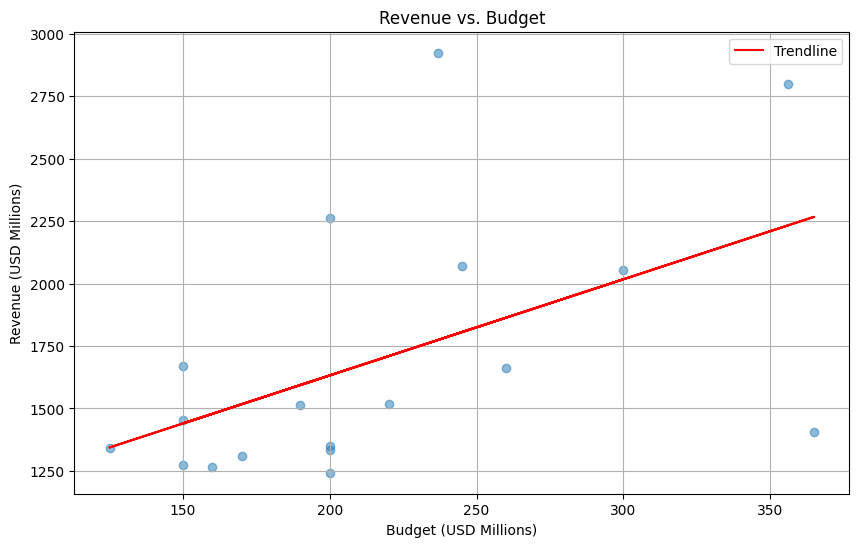

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df['budget_musd'], df['revenue_musd'], alpha=0.5)
plt.title('Revenue vs. Budget')
plt.xlabel('Budget (USD Millions)')
plt.ylabel('Revenue (USD Millions)')

z = np.polyfit(df['budget_musd'], df['revenue_musd'], 1)
p = np.poly1d(z)
plt.plot(df['budget_musd'], p(df['budget_musd']), color='red', label='Trendline')
plt.legend()

plt.grid(True)
plt.show()

Visualizing ROI Distribution by Genre

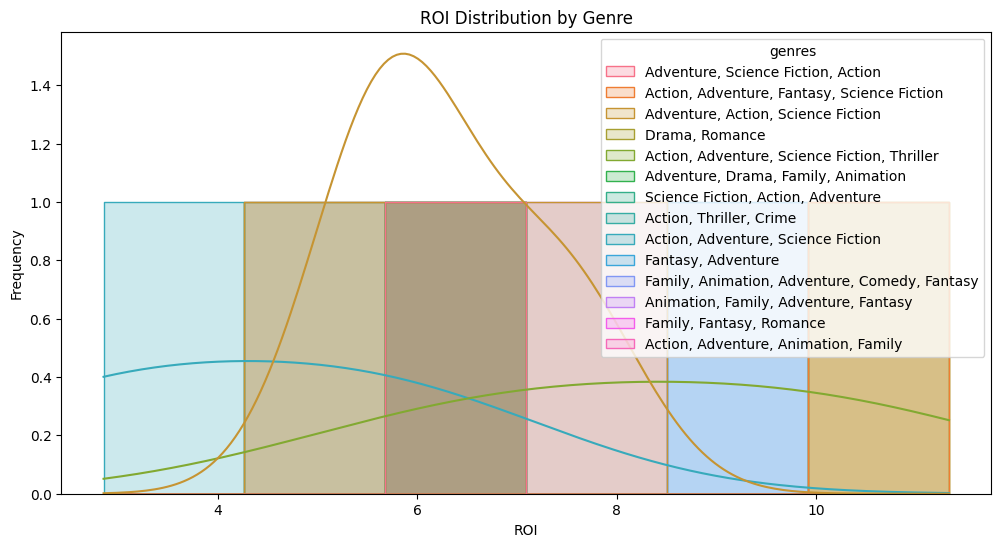

In [38]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ROI', hue='genres', kde=True, element="step")
plt.title('ROI Distribution by Genre')
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.show()

Visualizing Popularity vs. Rating

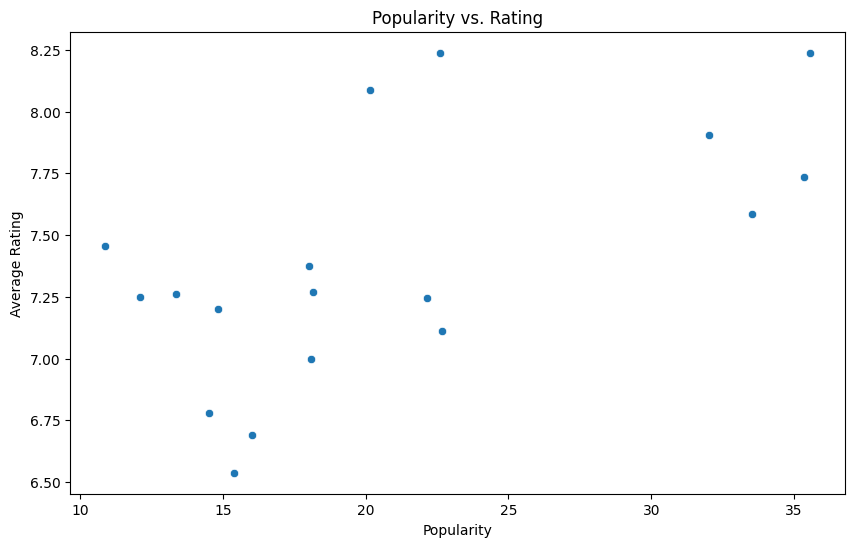

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average')
plt.title('Popularity vs. Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.show()

Visualizing Trends in Box Office Performance

<ipython-input-41-d39d366412af>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_year'] = pd.to_datetime(df['release_date']).dt.year


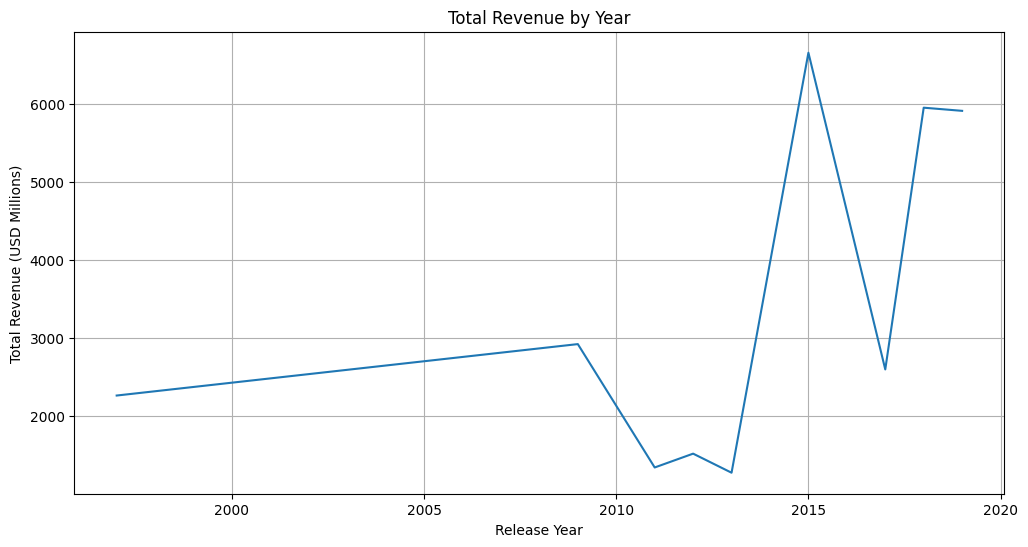

In [41]:
    df['release_year'] = pd.to_datetime(df['release_date']).dt.year
    yearly_revenue = df.groupby('release_year')['revenue_musd'].sum()
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_revenue.index, yearly_revenue.values)
    plt.title('Total Revenue by Year')
    plt.xlabel('Release Year')
    plt.ylabel('Total Revenue (USD Millions)')
    plt.grid(True)
    plt.show()

Comparison of Franchise vs. Standalone Success